In [19]:
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
import pandas as pd
from pyprojroot import here
import numpy as np

test_pd = pd.read_csv(here(r"data/sign_language_mnist/sign_mnist_test.csv"))
train_pd = pd.read_csv(here(r"data/sign_language_mnist/sign_mnist_train.csv"))
test_pd

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


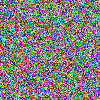

In [13]:
img = np.random.random(size=(100, 100, 3))
keras.utils.array_to_img(img)

In [ ]:
# remove label
train_label = train_pd["label"].to_numpy()
test_label = test["label"].to_numpy()

train = train_pd.drop(columns=["label"]).to_numpy().reshape(-1, 28, 28, 1) # obs, width, height, channels
test = test_pd.drop(columns=["label"]).to_numpy().reshape(-1, 28, 28, 1)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [26]:
from keras import layers
mlp = keras.Sequential([
  layers.Input(shape=(28, 28, 1)),
  layers.Flatten(),
  layers.Dense(2**9, activation="relu"),
  layers.Dense(2**8, activation="relu"),
  layers.Dense(2**7, activation="relu"),
  layers.Dense(2**6, activation="relu"),
  layers.Dense(26)
])
mlp.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]